In [1]:
from astroquery.xmatch import XMatch
from astropy import units as u
from astropy.table import Table
import astroquery.vizier as Vizier
import astropy.coordinates as SkyCoord
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os

DIR = 'E:/Documents/Papers/Azamat_variables/'
os.chdir(DIR)

Could not import regions, which is required for some of the functionalities of this module.


In [174]:
#Read columns with coordinates to a DataFrame
coord_VAR = pd.read_csv('asassn_variables_x.csv', usecols=['ID','RAJ2000','DEJ2000'])

In [19]:
#Download 4XMM catalogue and convert it to a DataFrame
Vizier.Vizier.ROW_LIMIT = -1
catalog_list=Vizier.Vizier.get_catalogs('IX/69/xmm4d13s')
XMM_catalog=catalog_list[0]
XMM_pandas=XMM_catalog.to_pandas()

In [53]:
#Cross-correlation of catalogues and choosing objects with separation less than 5 arcsec. 
max_sep = 5.0 * u.arcsec
c = SkyCoord.SkyCoord(ra=coord_VAR.RA*u.degree, dec=coord_VAR.DE*u.degree, frame='icrs')
catalog = SkyCoord.SkyCoord(ra=XMM_pandas.RA_ICRS*u.degree, dec=XMM_pandas.DE_ICRS*u.degree, frame='icrs')
idx, d2d, d3d = c.match_to_catalog_3d(catalog)
sep_constraint = d2d < max_sep

In [112]:
#Convert separations to arcsec and calculate the number of objects with separation less than 2 arcsec
dist_arcsec = pd.Series(d2d[sep_constraint]*3600, dtype=float)
under_2arcsec = int(dist_arcsec.lt(2).value_counts('True')[1].round(2)*100)

Text(0.5, 1.0, '83% out of 2436 values are less than 2" ')

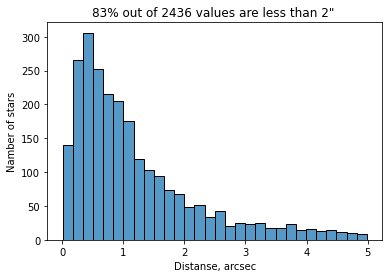

In [190]:
#Plot distribution of the separations under 5 arcsec
number_of_matches = len(idx[sep_constraint])
sns.histplot(data=d2d[sep_constraint]*3600)
plt.xlabel('Distanse, arcsec')
plt.ylabel('Namber of stars')
plt.title(f'{under_2arcsec}% out of {number_of_matches} values are less than 2\" ')

In [177]:
#exclude mathced objects
matches = XMM_pandas.iloc[idx[sep_constraint]]

In [179]:
matches.head()

,_4XMM,RA_ICRS,DE_ICRS,srcML,Flux8,e_Flux8,HR1,HR2,HR3,HR4,ext,V,S,Nd,uIRAP,xcatDB
21176,J004459.3-013020,11.247166,-1.505826,2115.3300,6.277350e-14,5.500240e-15,0.360493,-0.236526,-0.747886,-0.268259,0.0,0,0,1,http://xmm-catalog.irap.omp.eu/source/20560192...,xcatDB
17580,J004136.5-092338,10.402335,-9.394070,48.1809,4.939540e-15,1.908980e-15,0.557846,-0.883098,-1.000000,1.000000,0.0,0,3,2,http://xmm-catalog.irap.omp.eu/source/20723802...,xcatDB
39725,J011648.3-002104,19.201440,-0.351156,2196.5200,2.293800e-13,1.343220e-14,0.457515,-0.160530,-0.674200,-0.614841,0.0,0,0,3,http://xmm-catalog.irap.omp.eu/source/20747400...,xcatDB
59470,J020332.1-051336,30.883970,-5.226729,10.7879,6.208260e-15,3.377920e-15,0.357844,-0.148269,-0.509763,-0.719079,0.0,0,0,1,http://xmm-catalog.irap.omp.eu/source/20677640...,xcatDB
65223,J021303.3-040414,33.264015,-4.070654,106.7540,1.931180e-14,5.746140e-15,0.477722,-0.174339,-0.722798,-1.000000,0.0,0,0,1,http://xmm-catalog.irap.omp.eu/source/20677610...,xcatDB


In [181]:
#Change indexes to add columns to the ASASSN_variables DataFrame 
matches.set_index(coord_VAR[sep_constraint].index, inplace = True)
matches.head()

,_4XMM,RA_ICRS,DE_ICRS,srcML,Flux8,e_Flux8,HR1,HR2,HR3,HR4,ext,V,S,Nd,uIRAP,xcatDB
0,J004459.3-013020,11.247166,-1.505826,2115.3300,6.277350e-14,5.500240e-15,0.360493,-0.236526,-0.747886,-0.268259,0.0,0,0,1,http://xmm-catalog.irap.omp.eu/source/20560192...,xcatDB
18,J004136.5-092338,10.402335,-9.394070,48.1809,4.939540e-15,1.908980e-15,0.557846,-0.883098,-1.000000,1.000000,0.0,0,3,2,http://xmm-catalog.irap.omp.eu/source/20723802...,xcatDB
204,J011648.3-002104,19.201440,-0.351156,2196.5200,2.293800e-13,1.343220e-14,0.457515,-0.160530,-0.674200,-0.614841,0.0,0,0,3,http://xmm-catalog.irap.omp.eu/source/20747400...,xcatDB
208,J020332.1-051336,30.883970,-5.226729,10.7879,6.208260e-15,3.377920e-15,0.357844,-0.148269,-0.509763,-0.719079,0.0,0,0,1,http://xmm-catalog.irap.omp.eu/source/20677640...,xcatDB
211,J021303.3-040414,33.264015,-4.070654,106.7540,1.931180e-14,5.746140e-15,0.477722,-0.174339,-0.722798,-1.000000,0.0,0,0,1,http://xmm-catalog.irap.omp.eu/source/20677610...,xcatDB


In [185]:
catalog_VAR=pd.read_csv('asassn_variables_x.csv')

In [186]:
catalog_VAR['Flux8'] = matches['Flux8']
catalog_VAR['V'] = matches['V']

In [189]:
catalog_VAR.to_csv('ASASSN_to_4XMM.csv')